In [27]:
%matplotlib notebook

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [29]:
games_df = pd.read_csv("Games_df.csv")

In [30]:
games_df.dtypes

Unnamed: 0                      int64
Game Title                     object
Game Category                  object
Game Score                    float64
Number of Reviews               int64
Price                         float64
Number of Installs              int64
Developer                      object
Play Store URL                 object
Total Download Revenue ($)    float64
dtype: object

In [31]:
games_df

,Unnamed: 0,Game Title,Game Category,Game Score,Number of Reviews,Price,Number of Installs,Developer,Play Store URL,Total Download Revenue ($)
0,0,Grand Theft Auto: San Andreas,GAME_ACTION,4.3,387897,6.99,1000000,Rockstar Games,https://play.google.com/store/apps/details?id=...,6990000.00
1,1,Five Nights at Freddy's,GAME_ACTION,4.6,103826,2.99,1000000,Scott Cawthon,https://play.google.com/store/apps/details?id=...,2990000.00
2,2,Five Nights at Freddy's: SL,GAME_ACTION,4.5,17369,2.99,100000,Scott Cawthon,https://play.google.com/store/apps/details?id=...,299000.00
3,3,Hitman Sniper,GAME_ACTION,4.6,592148,0.99,10000000,SQUARE ENIX Ltd,https://play.google.com/store/apps/details?id=...,9900000.00
4,4,Assassin's Creed Identity,GAME_ACTION,3.8,50021,1.99,500000,Ubisoft Entertainment,https://play.google.com/store/apps/details?id=...,995000.00
5,5,Five Nights at Freddy's 4,GAME_ACTION,4.6,21580,2.99,100000,Scott Cawthon,https://play.google.com/store/apps/details?id=...,299000.00
6,6,Space Marshals,GAME_ACTION,4.8,7931,0.99,50000,Pixelbite,https://play.google.com/store/apps/details?id=...,49500.00
7,7,Call of Duty:Black Ops Zombies,GAME_ACTION,4.2,14006,6.99,100000,"Activision Publishing, Inc.",https://play.google.com/store/apps/details?id=...,699000.00
8,8,Grand Theft Auto III,GAME_ACTION,4.0,96670,4.99,1000000,Rockstar Games,https://play.google.com/store/apps/details?id=...,4990000.00
9,9,truTV Impractical Jokers Wheel of Doom,GAME_ACTION,4.3,170,2.99,5000,truTVnetwork,https://play.google.com/store/apps/details?id=...,14950.00


In [32]:
games_df = games_df.rename(columns={"Total Download Revenue ($)":"Revenue","Number of Installs":"Installs"})

In [33]:
#sorting all 425 results by total revenue.
top_games = games_df.sort_values(by='Revenue', ascending=False)

In [34]:
new_df = top_games.iloc[2:]

In [35]:
new_df

,Unnamed: 0,Game Title,Game Category,Game Score,Number of Reviews,Price,Installs,Developer,Play Store URL,Revenue
0,0,Grand Theft Auto: San Andreas,GAME_ACTION,4.3,387897,6.99,1000000,Rockstar Games,https://play.google.com/store/apps/details?id=...,6990000.00
8,8,Grand Theft Auto III,GAME_ACTION,4.0,96670,4.99,1000000,Rockstar Games,https://play.google.com/store/apps/details?id=...,4990000.00
52,52,Grand Theft Auto: Vice City,GAME_ARCADE,4.3,132122,4.99,1000000,Rockstar Games,https://play.google.com/store/apps/details?id=...,4990000.00
26,26,Terraria.,GAME_ADVENTURE,4.3,231424,4.99,1000000,505 Games Srl,https://play.google.com/store/apps/details?id=...,4990000.00
303,303,Goat Simulator,GAME_SIMULATION,4.3,100981,4.99,1000000,Coffee Stain Publishing,https://play.google.com/store/apps/details?id=...,4990000.00
65,65,Worms 3,GAME_ARCADE,4.2,67904,4.99,1000000,Team 17 Digital Limited,https://play.google.com/store/apps/details?id=...,4990000.00
253,253,Need for Speed Most Wanted,GAME_RACING,3.9,44742,4.99,1000000,ELECTRONIC ARTS,https://play.google.com/store/apps/details?id=...,4990000.00
232,232,Monument Valley,GAME_PUZZLE,4.8,208449,3.99,1000000,ustwo games,https://play.google.com/store/apps/details?id=...,3990000.00
61,61,SuperRetro16 ( SNES Emulator ),GAME_ARCADE,4.3,38564,3.99,1000000,Neutron Emulation,https://play.google.com/store/apps/details?id=...,3990000.00
375,375,Trivia Crack (No Ads),GAME_TRIVIA,4.5,61210,5.99,500000,Etermax,https://play.google.com/store/apps/details?id=...,2995000.00


In [36]:
#extract top 25 games according to their revenue from df
top_games = top_games['Revenue'].nlargest(25).to_frame()
top_games = games_df.loc[top_games.index]

<IPython.core.display.Javascript object>


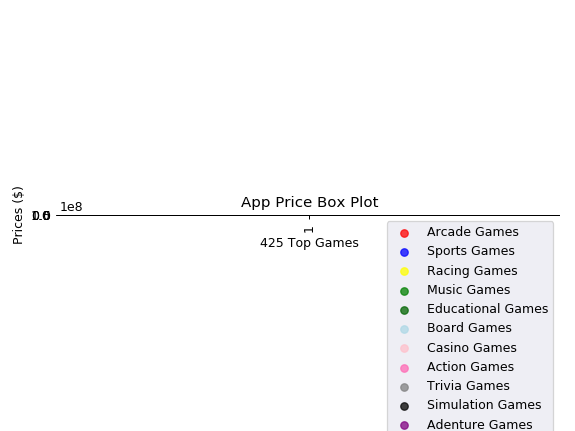

In [37]:
#show top_games data through a bar chart/ version 1
tick_location = np.arange(len(top_games))
rev1 = plt.bar(tick_location,top_games["Revenue"], align="center", color="tab:blue",label="revenue")
rev2 = plt.bar(tick_location,top_games["Installs"], align="center",color="orange",label="total download")
plt.xticks(tick_location,top_games["Game Title"], rotation=90)
plt.xticks()

plt.xlim(-1, len(top_games))
plt.title("Revenues Generated from Top 25 Paid Games")
plt.ylim(0,max(top_games["Revenue"]+5000000))
plt.ylabel("Total Download Revenue (10 million)")

plt.tight_layout()
plt.legend()
plt.savefig("Images/top_paid_games_boxplot.png")

In [38]:
#showing the data with a scatter plot

arcade = top_games.loc[top_games["Game Category"]=="GAME_ARCADE"]
sports = top_games.loc[top_games["Game Category"]=="GAME_SPORTS"]
racing = top_games.loc[top_games["Game Category"]=="GAME_RACING"]
music = top_games.loc[top_games["Game Category"]=="GAME_MUSIC"]
educational = top_games.loc[top_games["Game Category"]== "GAME_EDUCATIONAL"]
board = top_games.loc[top_games["Game Category"]=="GAME_BOARD"]
casino = top_games.loc[top_games["Game Category"]=="GAME_CASINO"]
action = top_games.loc[top_games["Game Category"]=="GAME_ACTION"]
trivia = top_games.loc[top_games["Game Category"]=="GAME_TRIVIA"]
simulation = top_games.loc[top_games["Game Category"]=="GAME_SIMULATION"]
adventure = top_games.loc[top_games["Game Category"]=="GAME_ADVENTURE"]
puzzle = top_games.loc[top_games["Game Category"]=="GAME_PUZZLE"]
card = top_games.loc[top_games["Game Category"]=="GAME_CARD"]
casual = top_games.loc[top_games["Game Category"]=="GAME_CASUAL"]
strategy = top_games.loc[top_games["Game Category"]=="GAME_STRATEGY"]                       
roleplay = top_games.loc[top_games["Game Category"]=="GAME_ROLE_PLAYING"]
word = top_games.loc[top_games["Game Category"]=="GAME_WORD"]

In [39]:
#building scatter plots for each category
arcade_p = plt.scatter(arcade["Installs"], arcade["Price"], marker="o"
                       , label="Arcade Games", color="red", alpha=0.75)
sports_p = plt.scatter(sports["Installs"], sports["Price"], marker="o",
                        label="Sports Games", color="blue", alpha=0.75)
racing_p = plt.scatter(racing["Installs"], racing["Price"], marker="o",
                        label="Racing Games", color="yellow", alpha=0.75)
music_p = plt.scatter(music["Installs"], music["Price"], marker="o",
                        label="Music Games", color="green", alpha=0.75)
educational_p = plt.scatter(educational["Installs"], educational["Price"],
                            marker="o",label="Educational Games", color="darkgreen", alpha=0.75)
board_p = plt.scatter(board["Installs"], board["Price"], marker="o",
                       label="Board Games", color="lightblue", alpha=0.75)
casino_p = plt.scatter(casino["Installs"], casino["Price"], marker="o",
                       label="Casino Games", color="pink", alpha=0.75)
action_p = plt.scatter(action["Installs"], action["Price"], marker="o",
                       label="Action Games", color="hotpink", alpha=0.75)
trivia_p = plt.scatter(trivia["Installs"], trivia["Price"], marker="o",
                       label="Trivia Games", color="grey", alpha=0.75)
simulation_p = plt.scatter(simulation["Installs"], simulation["Price"], marker="o",
                       label="Simulation Games", color="black", alpha=0.75)
adventure_p = plt.scatter(adventure["Installs"], adventure["Price"], marker="o",
                       label="Adenture Games", color="purple", alpha=0.75)
puzzle_p = plt.scatter(puzzle["Installs"], puzzle["Price"], marker="o",
                        label="Puzzle Games", color="white", edgecolor="black",alpha=0.75)
card_p = plt.scatter(card["Installs"], card["Price"], marker="o",
                       label="Card Games", color="orange", alpha=0.75)
casual_p = plt.scatter(casual["Installs"], casual["Price"], marker="o",
                       label="Casual Games", color="blue",edgecolor="red", alpha=0.75)
strategy_p = plt.scatter(strategy["Installs"], strategy["Price"], marker="o",
                       label="Strategic Games", color="green", edgecolor="lightblue", alpha=0.75)
roleplay_p = plt.scatter(roleplay["Installs"], roleplay["Price"], marker="o",
                       label="Roleplay Games", color="yellow", edgecolor="purple", alpha=0.75)
word_p = plt.scatter(word["Installs"], word["Price"], marker="o",
                       label="Word Games", color="skyblue", alpha=0.75)

#labeling the graph
plt.xlabel("Installs (10 million)")
plt.ylabel("Price/App ($)")
plt.title("Price vs. Install")
#plt.legend((arcade_p,sports_p,racing_p,music_p,educational_p,board_p,casino_p,action_p,trivia_p,simulation_p,
           #adventure_p,puzzle_p,card_p,casual_p,strategy_p,roleplay_p,word_p),
           #("Arcade","Sports","Racing","Music","Education","Board","Casino","Action","Trivia","Simulation",
           #"Adventure","Puzzle","Card","Casual","Strategic","Roleplay","Word"))
plt.legend(loc="best", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.savefig("Images/PriceInstall.png")

In [40]:
#building scatter plots for each category
arcade_p = plt.scatter(arcade["Installs"], arcade["Game Score"], marker="o"
                       , label="Arcade Games", color="red", alpha=0.75)
sports_p = plt.scatter(sports["Installs"], sports["Game Score"], marker="o",
                        label="Sports Games", color="blue", alpha=0.75)
racing_p = plt.scatter(racing["Installs"], racing["Game Score"], marker="o",
                        label="Racing Games", color="yellow", alpha=0.75)
music_p = plt.scatter(music["Installs"], music["Game Score"], marker="o",
                        label="Music Games", color="green", alpha=0.75)
educational_p = plt.scatter(educational["Installs"], educational["Game Score"],
                            marker="o",label="Educational Games", color="darkgreen", alpha=0.75)
board_p = plt.scatter(board["Installs"], board["Game Score"], marker="o",
                       label="Board Games", color="lightblue", alpha=0.75)
casino_p = plt.scatter(casino["Installs"], casino["Game Score"], marker="o",
                       label="Casino Games", color="pink", alpha=0.75)
action_p = plt.scatter(action["Installs"], action["Game Score"], marker="o",
                       label="Action Games", color="hotpink", alpha=0.75)
trivia_p = plt.scatter(trivia["Installs"], trivia["Game Score"], marker="o",
                       label="Trivia Games", color="grey", alpha=0.75)
simulation_p = plt.scatter(simulation["Installs"], simulation["Game Score"], marker="o",
                       label="Simulation Games", color="black", alpha=0.75)
adventure_p = plt.scatter(adventure["Installs"], adventure["Game Score"], marker="o",
                       label="Adenture Games", color="purple", alpha=0.75)
puzzle_p = plt.scatter(puzzle["Installs"], puzzle["Game Score"], marker="o",
                        label="Puzzle Games", color="white", edgecolor="black",alpha=0.75)
card_p = plt.scatter(card["Installs"], card["Game Score"], marker="o",
                       label="Card Games", color="orange", alpha=0.75)
casual_p = plt.scatter(casual["Installs"], casual["Game Score"], marker="o",
                       label="Casual Games", color="blue",edgecolor="red", alpha=0.75)
strategy_p = plt.scatter(strategy["Installs"], strategy["Game Score"], marker="o",
                       label="Strategic Games", color="green", edgecolor="lightblue", alpha=0.75)
roleplay_p = plt.scatter(roleplay["Installs"], roleplay["Game Score"], marker="o",
                       label="Roleplay Games", color="yellow", edgecolor="purple", alpha=0.75)
word_p = plt.scatter(word["Installs"], word["Game Score"], marker="o",
                       label="Word Games", color="skyblue", alpha=0.75)

#labeling the graph
plt.xlabel("Installs (10 million)")
plt.ylabel("Game Rating")
plt.title("Rating vs. Install")
#plt.legend((arcade_p,sports_p,racing_p,music_p,educational_p,board_p,casino_p,action_p,trivia_p,simulation_p,
           #adventure_p,puzzle_p,card_p,casual_p,strategy_p,roleplay_p,word_p),
           #("Arcade","Sports","Racing","Music","Education","Board","Casino","Action","Trivia","Simulation",
           #"Adventure","Puzzle","Card","Casual","Strategic","Roleplay","Word"))
plt.legend(loc="best", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()
plt.savefig("Images/RatingInstall.png")

/Users/emmanuelfabre/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:182: UserWarning: The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('The bottom and top margins cannot be made large '


In [41]:
price = games_df["Price"]

In [42]:
plt.boxplot(price,showmeans=True)
plt.grid()
plt.show()
plt.title("App Price Box Plot")
plt.ylabel("Prices ($)")
plt.xlabel("425 Top Games")
plt.tight_layout()
plt.savefig("Images/boxplot.png")

/Users/emmanuelfabre/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:182: UserWarning: The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('The bottom and top margins cannot be made large '


In [43]:
q1=np.percentile(price,25)
q3=np.percentile(price,75)

In [44]:
print(f"25% percentile of the avaiable data based on price is {q1}.")
print(f"75% percentile of the avaiable data based on price is {q3}.")

25% percentile of the avaiable data based on price is 1.99.
75% percentile of the avaiable data based on price is 4.99.


In [45]:
iqr = (q3-q1)
print("interqurtile range:", iqr)

interqurtile range: 3.0


In [46]:
#find lower boundary
lower_broundary = q1 - (1.5*iqr)

#find upper boundary
upper_broundary = q3 + (1.5*iqr)

In [47]:
price[price<=lower_broundary]

Series([], Name: Price, dtype: float64)

In [48]:
price[price>=upper_broundary]

46     20.99
88      9.99
133    34.99
135    19.99
141    14.00
146    15.00
276     9.99
280     9.99
281    19.99
282    15.99
285     9.99
286     9.99
306    11.99
357     9.99
359     9.99
365     9.99
378    24.99
379    29.99
381    24.99
383    24.99
387    24.99
389     9.99
Name: Price, dtype: float64

In [49]:
new_df

,Unnamed: 0,Game Title,Game Category,Game Score,Number of Reviews,Price,Installs,Developer,Play Store URL,Revenue
0,0,Grand Theft Auto: San Andreas,GAME_ACTION,4.3,387897,6.99,1000000,Rockstar Games,https://play.google.com/store/apps/details?id=...,6990000.00
8,8,Grand Theft Auto III,GAME_ACTION,4.0,96670,4.99,1000000,Rockstar Games,https://play.google.com/store/apps/details?id=...,4990000.00
52,52,Grand Theft Auto: Vice City,GAME_ARCADE,4.3,132122,4.99,1000000,Rockstar Games,https://play.google.com/store/apps/details?id=...,4990000.00
26,26,Terraria.,GAME_ADVENTURE,4.3,231424,4.99,1000000,505 Games Srl,https://play.google.com/store/apps/details?id=...,4990000.00
303,303,Goat Simulator,GAME_SIMULATION,4.3,100981,4.99,1000000,Coffee Stain Publishing,https://play.google.com/store/apps/details?id=...,4990000.00
65,65,Worms 3,GAME_ARCADE,4.2,67904,4.99,1000000,Team 17 Digital Limited,https://play.google.com/store/apps/details?id=...,4990000.00
253,253,Need for Speed Most Wanted,GAME_RACING,3.9,44742,4.99,1000000,ELECTRONIC ARTS,https://play.google.com/store/apps/details?id=...,4990000.00
232,232,Monument Valley,GAME_PUZZLE,4.8,208449,3.99,1000000,ustwo games,https://play.google.com/store/apps/details?id=...,3990000.00
61,61,SuperRetro16 ( SNES Emulator ),GAME_ARCADE,4.3,38564,3.99,1000000,Neutron Emulation,https://play.google.com/store/apps/details?id=...,3990000.00
375,375,Trivia Crack (No Ads),GAME_TRIVIA,4.5,61210,5.99,500000,Etermax,https://play.google.com/store/apps/details?id=...,2995000.00


In [50]:
stars2 = new_df[new_df['Game Score'] == 4.1]["Revenue"]
stars3 = new_df[new_df['Game Score'] == 4.2]["Revenue"]
stars4 = new_df[new_df['Game Score'] == 4.3]["Revenue"]
stars5 = new_df[new_df['Game Score'] == 4.4]["Revenue"]
stars6 = new_df[new_df['Game Score'] == 4.5]["Revenue"]
stars7 = new_df[new_df['Game Score'] == 4.6]["Revenue"]
stars8 = new_df[new_df['Game Score'] == 4.7]["Revenue"]
stars9 = new_df[new_df['Game Score'] == 4.8]["Revenue"]
stars10 = new_df[new_df['Game Score'] == 4.9]["Revenue"]

data_by_star = [stars2,stars3,stars4,stars5,stars6,stars7,stars8,stars9,stars10]

<IPython.core.display.Javascript object>


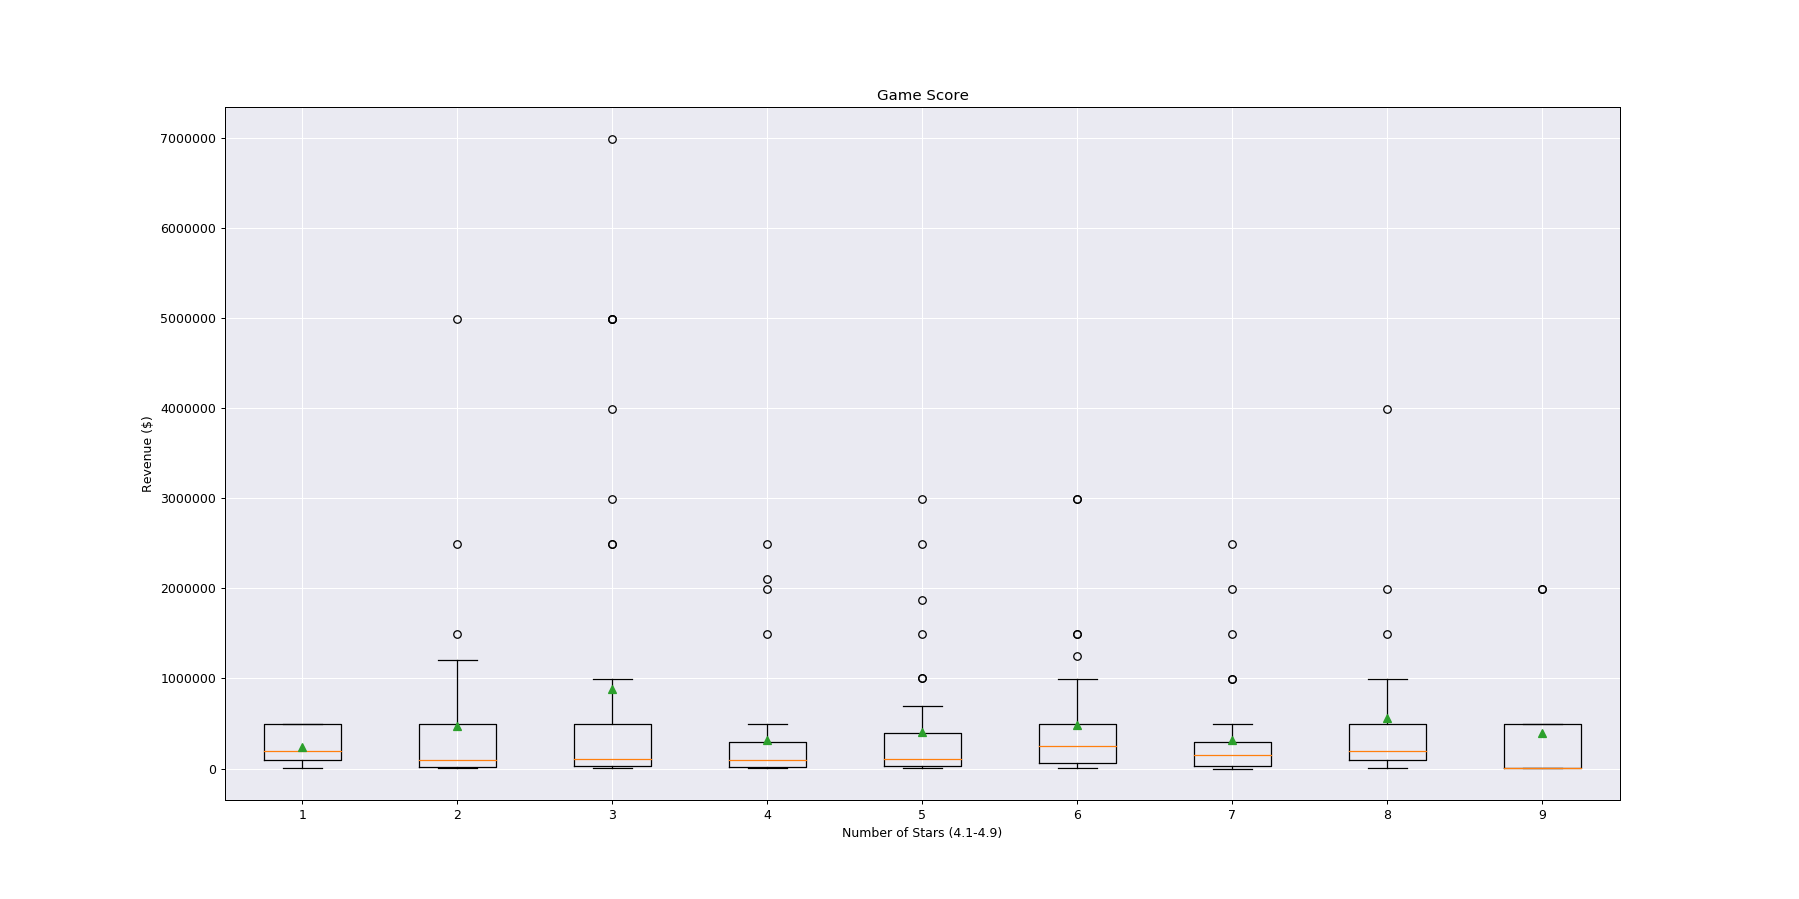

In [51]:
plt.figure(figsize=(20,10))
plt.rcParams['axes.facecolor'] = '#eaeaf2'
plt.boxplot(data_by_star, showmeans=True)
plt.title('Game Score')
plt.xlabel('Number of Stars (4.1-4.9)')
plt.ylabel('Revenue ($)')
plt.savefig('Images/revenueboxplot.png')
plt.grid(color='w')
plt.show()